In [513]:
import requests
import json
import pandas as pd
%run APIkeys.py
key = os.environ['BLS_API_key']

In [514]:
defaultLoc = "CUUR0000"
newYark = "CUURS12A"
phil = "CUURS12B"
chic = "CUURS23A"
defaultItem = "SA0"
trans = "SAT"
fuel = "SETB"
food = "SAF1"
rent = "SEHA"
util = "SAH2"
apprl = "SAA"
rec = "SAR"
dura = "SAD"

### for loops that create a combnination for all of the locations


In [515]:
locations = [newYark,phil,chic,defaultLoc]
goods = [trans,fuel,food,rent,util,apprl,rec,dura,defaultItem]
codes= []
for i in locations:
    for x in goods:
        codes.append(i+x)

In [516]:
newYark_varList=[]
for x in goods:
    newYark_varList.append(locations[0]+x)
newYark_varList

['CUURS12ASAT',
 'CUURS12ASETB',
 'CUURS12ASAF1',
 'CUURS12ASEHA',
 'CUURS12ASAH2',
 'CUURS12ASAA',
 'CUURS12ASAR',
 'CUURS12ASAD',
 'CUURS12ASA0']

In [517]:
phil_varList=[]
for x in goods:
    phil_varList.append(locations[1]+x)
phil_varList

['CUURS12BSAT',
 'CUURS12BSETB',
 'CUURS12BSAF1',
 'CUURS12BSEHA',
 'CUURS12BSAH2',
 'CUURS12BSAA',
 'CUURS12BSAR',
 'CUURS12BSAD',
 'CUURS12BSA0']

In [518]:
chic_varList=[]
for x in goods:
    chic_varList.append(locations[2]+x)
chic_varList

['CUURS23ASAT',
 'CUURS23ASETB',
 'CUURS23ASAF1',
 'CUURS23ASEHA',
 'CUURS23ASAH2',
 'CUURS23ASAA',
 'CUURS23ASAR',
 'CUURS23ASAD',
 'CUURS23ASA0']

### Function to call API and retrieve data

In [519]:
def multiSeriesV4(varList,myKey):
    # Input: varList = a list of strings containing the series names
    # Input: myKey =  a string containing your BLS API key
    # Output: new_df = a data frame containing the data collected
    
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    new_df = pd.DataFrame(columns=['year', 'period'])
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #length of the list
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})
            current_df = current_df.rename(columns = {'value':varList[item]})
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer')
    
    return new_df

In [520]:
df_newYark = multiSeriesV4(newYark_varList,key)

Series  CUURS12ASAT  exists with  61  observations
Series  CUURS12ASETB  exists with  61  observations
Series  CUURS12ASAF1  exists with  61  observations
Series  CUURS12ASEHA  exists with  61  observations
Series  CUURS12ASAH2  exists with  61  observations
Series  CUURS12ASAA  exists with  61  observations
Series  CUURS12ASAR  exists with  61  observations
Series  CUURS12ASAD  exists with  61  observations
Series  CUURS12ASA0  exists with  61  observations


In [521]:
df_newYark

,year,period,CUURS12ASAT,CUURS12ASETB,CUURS12ASAF1,CUURS12ASEHA,CUURS12ASAH2,CUURS12ASAA,CUURS12ASAR,CUURS12ASAD,CUURS12ASA0
0,2022,M01,246.742,270.875,305.120,412.105,241.143,128.412,139.592,111.650,300.164
1,2021,M12,247.278,273.756,302.121,410.839,210.056,121.188,138.384,109.670,296.865
2,2021,M11,247.737,277.098,301.334,410.245,212.512,123.389,140.562,108.264,297.490
3,2021,M10,243.749,266.644,299.049,410.024,215.260,128.729,138.870,107.002,296.472
4,2021,M09,238.286,256.123,297.658,409.529,213.898,130.404,137.315,105.997,295.488
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,215.630,198.945,260.113,380.197,191.160,126.946,123.371,94.537,268.183
57,2017,M04,214.862,197.812,260.674,378.952,186.115,130.086,123.860,94.726,267.948
58,2017,M03,211.912,191.121,259.498,378.523,186.430,133.045,123.262,94.884,267.582
59,2017,M02,213.382,195.510,258.088,377.592,187.826,130.424,123.301,95.108,267.662


In [522]:
df_phil = multiSeriesV4(phil_varList,key)

Series  CUURS12BSAT  exists with  30  observations
Series  CUURS12BSETB  exists with  61  observations
Series  CUURS12BSAF1  exists with  30  observations
Series  CUURS12BSEHA  exists with  61  observations
Series  CUURS12BSAH2  exists with  30  observations
Series  CUURS12BSAA  exists with  30  observations
Series  CUURS12BSAR  exists with  30  observations
Series  CUURS12BSAD  exists with  30  observations
Series  CUURS12BSA0  exists with  30  observations


In [523]:
df_phil

,year,period,CUURS12BSAT,CUURS12BSETB,CUURS12BSAF1,CUURS12BSEHA,CUURS12BSAH2,CUURS12BSAA,CUURS12BSAR,CUURS12BSAD,CUURS12BSA0
0,2021,M12,245.890,318.304,260.566,331.017,232.186,104.635,128.821,129.603,277.163
1,2021,M10,243.516,310.673,256.795,326.997,221.643,108.967,128.287,129.302,274.647
2,2021,M08,239.394,295.323,252.659,326.468,215.703,109.781,127.160,126.361,272.044
3,2021,M06,238.189,285.626,252.233,324.064,212.873,107.951,128.137,125.249,270.499
4,2021,M04,220.407,266.588,249.307,320.992,209.987,110.576,125.476,115.259,265.355
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M09,NaN,250.847,NaN,297.460,NaN,NaN,NaN,NaN,NaN
57,2017,M07,NaN,214.811,NaN,296.425,NaN,NaN,NaN,NaN,NaN
58,2017,M05,NaN,224.005,NaN,294.648,NaN,NaN,NaN,NaN,NaN
59,2017,M03,NaN,212.555,NaN,293.477,NaN,NaN,NaN,NaN,NaN


In [524]:
df_chic = multiSeriesV4(chic_varList,key)

Series  CUURS23ASAT  exists with  61  observations
Series  CUURS23ASETB  exists with  61  observations
Series  CUURS23ASAF1  exists with  61  observations
Series  CUURS23ASEHA  exists with  61  observations
Series  CUURS23ASAH2  exists with  61  observations
Series  CUURS23ASAA  exists with  61  observations
Series  CUURS23ASAR  exists with  61  observations
Series  CUURS23ASAD  exists with  61  observations
Series  CUURS23ASA0  exists with  61  observations


In [525]:
df_chic

,year,period,CUURS23ASAT,CUURS23ASETB,CUURS23ASAF1,CUURS23ASEHA,CUURS23ASAH2,CUURS23ASAA,CUURS23ASAR,CUURS23ASAD,CUURS23ASA0
0,2022,M01,214.728,302.793,289.350,365.851,246.308,85.619,117.793,100.057,262.730
1,2021,M12,213.160,301.508,285.170,364.376,247.096,82.422,116.636,99.187,260.368
2,2021,M11,211.869,313.647,284.159,363.766,242.674,82.241,114.917,96.180,259.254
3,2021,M10,210.302,308.848,281.868,361.733,241.751,85.005,114.428,96.300,258.621
4,2021,M09,204.876,299.410,281.139,362.153,237.382,85.786,109.241,94.826,256.881
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,183.936,221.368,243.852,320.162,202.820,86.119,111.163,88.379,233.443
57,2017,M04,186.064,231.854,241.723,319.569,201.534,86.812,113.185,88.096,233.066
58,2017,M03,182.158,215.119,242.842,318.071,203.895,83.546,113.501,88.036,232.225
59,2017,M02,180.859,211.378,242.088,318.021,203.417,86.958,111.345,88.288,232.491


In [526]:
df = multiSeriesV4(codes,key)

Series  CUURS12ASAT  exists with  61  observations
Series  CUURS12ASETB  exists with  61  observations
Series  CUURS12ASAF1  exists with  61  observations
Series  CUURS12ASEHA  exists with  61  observations
Series  CUURS12ASAH2  exists with  61  observations
Series  CUURS12ASAA  exists with  61  observations
Series  CUURS12ASAR  exists with  61  observations
Series  CUURS12ASAD  exists with  61  observations
Series  CUURS12ASA0  exists with  61  observations
Series  CUURS12BSAT  exists with  30  observations
Series  CUURS12BSETB  exists with  61  observations
Series  CUURS12BSAF1  exists with  30  observations
Series  CUURS12BSEHA  exists with  61  observations
Series  CUURS12BSAH2  exists with  30  observations
Series  CUURS12BSAA  exists with  30  observations
Series  CUURS12BSAR  exists with  30  observations
Series  CUURS12BSAD  exists with  30  observations
Series  CUURS12BSA0  exists with  30  observations
Series  CUURS23ASAT  exists with  61  observations
Series  CUURS23ASETB  e

In [527]:
dataframe_list = [df_newYark, df_phil, df_chic]

### renaming columns for readability

In [528]:
df_chic = df_chic.rename(columns = {'CUURS23ASAT':'trans','CUURS23ASETB':'fuel','CUURS23ASAF1':'food','CUURS23ASEHA':'rent','CUURS23ASAH2':'util','CUURS23ASAA':'apprl','CUURS23ASAR':'rec','CUURS23ASAD':'dura','CUURS23ASA0':'default'})

In [529]:
df_chic

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default
0,2022,M01,214.728,302.793,289.350,365.851,246.308,85.619,117.793,100.057,262.730
1,2021,M12,213.160,301.508,285.170,364.376,247.096,82.422,116.636,99.187,260.368
2,2021,M11,211.869,313.647,284.159,363.766,242.674,82.241,114.917,96.180,259.254
3,2021,M10,210.302,308.848,281.868,361.733,241.751,85.005,114.428,96.300,258.621
4,2021,M09,204.876,299.410,281.139,362.153,237.382,85.786,109.241,94.826,256.881
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,183.936,221.368,243.852,320.162,202.820,86.119,111.163,88.379,233.443
57,2017,M04,186.064,231.854,241.723,319.569,201.534,86.812,113.185,88.096,233.066
58,2017,M03,182.158,215.119,242.842,318.071,203.895,83.546,113.501,88.036,232.225
59,2017,M02,180.859,211.378,242.088,318.021,203.417,86.958,111.345,88.288,232.491


In [530]:
df_newYark = df_newYark.rename(columns = {'CUURS12ASAT':'trans','CUURS12ASETB':'fuel','CUURS12ASAF1':'food','CUURS12ASEHA':'rent','CUURS12ASAH2':'util','CUURS12ASAA':'apprl','CUURS12ASAR':'rec','CUURS12ASAD':'dura','CUURS12ASA0':'default'})

In [531]:
df_newYark

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default
0,2022,M01,246.742,270.875,305.120,412.105,241.143,128.412,139.592,111.650,300.164
1,2021,M12,247.278,273.756,302.121,410.839,210.056,121.188,138.384,109.670,296.865
2,2021,M11,247.737,277.098,301.334,410.245,212.512,123.389,140.562,108.264,297.490
3,2021,M10,243.749,266.644,299.049,410.024,215.260,128.729,138.870,107.002,296.472
4,2021,M09,238.286,256.123,297.658,409.529,213.898,130.404,137.315,105.997,295.488
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,215.630,198.945,260.113,380.197,191.160,126.946,123.371,94.537,268.183
57,2017,M04,214.862,197.812,260.674,378.952,186.115,130.086,123.860,94.726,267.948
58,2017,M03,211.912,191.121,259.498,378.523,186.430,133.045,123.262,94.884,267.582
59,2017,M02,213.382,195.510,258.088,377.592,187.826,130.424,123.301,95.108,267.662


In [532]:
df_phil = df_phil.rename(columns = {'CUURS12BSAT':'trans','CUURS12BSETB':'fuel','CUURS12BSAF1':'food','CUURS12BSEHA':'rent','CUURS12BSAH2':'util','CUURS12BSAA':'apprl','CUURS12BSAR':'rec','CUURS12BSAD':'dura','CUURS12BSA0':'default'})

In [533]:
df_phil

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default
0,2021,M12,245.890,318.304,260.566,331.017,232.186,104.635,128.821,129.603,277.163
1,2021,M10,243.516,310.673,256.795,326.997,221.643,108.967,128.287,129.302,274.647
2,2021,M08,239.394,295.323,252.659,326.468,215.703,109.781,127.160,126.361,272.044
3,2021,M06,238.189,285.626,252.233,324.064,212.873,107.951,128.137,125.249,270.499
4,2021,M04,220.407,266.588,249.307,320.992,209.987,110.576,125.476,115.259,265.355
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M09,NaN,250.847,NaN,297.460,NaN,NaN,NaN,NaN,NaN
57,2017,M07,NaN,214.811,NaN,296.425,NaN,NaN,NaN,NaN,NaN
58,2017,M05,NaN,224.005,NaN,294.648,NaN,NaN,NaN,NaN,NaN
59,2017,M03,NaN,212.555,NaN,293.477,NaN,NaN,NaN,NaN,NaN


### imported seabourne to analyze missing values

In [534]:
import seaborn as sns

<AxesSubplot:>

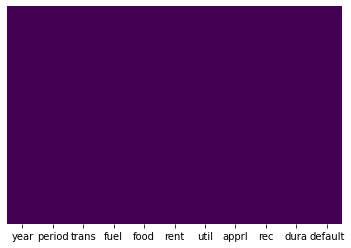

In [535]:
sns.heatmap(df_newYark.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:>

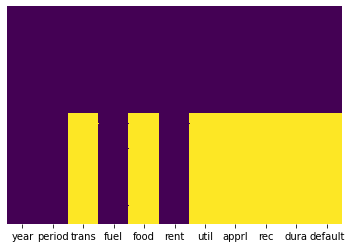

In [536]:
sns.heatmap(df_phil.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [537]:
df_phil = df_phil.fillna(250)

chose to replace all missing values with 250 at it seems that it is a rough average

<AxesSubplot:>

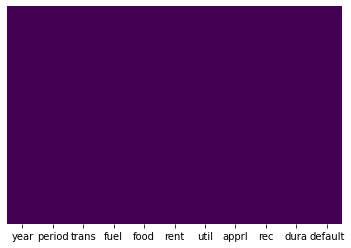

In [538]:
sns.heatmap(df_chic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### sorting values in preparation for plotting

In [539]:
df_newYark.sort_values(by=['year','period'],inplace=True,ascending=False)

In [540]:
df_phil.sort_values(by=['year','period'],inplace=True,ascending=False)

In [541]:
df_chic.sort_values(by=['year','period'],inplace=True,ascending=False)

In [542]:
df_newYark

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default
0,2022,M01,246.742,270.875,305.120,412.105,241.143,128.412,139.592,111.650,300.164
1,2021,M12,247.278,273.756,302.121,410.839,210.056,121.188,138.384,109.670,296.865
2,2021,M11,247.737,277.098,301.334,410.245,212.512,123.389,140.562,108.264,297.490
3,2021,M10,243.749,266.644,299.049,410.024,215.260,128.729,138.870,107.002,296.472
4,2021,M09,238.286,256.123,297.658,409.529,213.898,130.404,137.315,105.997,295.488
...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,215.630,198.945,260.113,380.197,191.160,126.946,123.371,94.537,268.183
57,2017,M04,214.862,197.812,260.674,378.952,186.115,130.086,123.860,94.726,267.948
58,2017,M03,211.912,191.121,259.498,378.523,186.430,133.045,123.262,94.884,267.582
59,2017,M02,213.382,195.510,258.088,377.592,187.826,130.424,123.301,95.108,267.662


### Creating the CPI for each location with the designated weights
#### locations
newYark - 0.46; Largest concentrated population of students.

chic - 0. 24

phil - 0.30; Next Largest

#### basket items
trans - 0.06; within city schools transportation is not as necessary as other campuses.

fuel - 0.02; even smaller consideration with low importance on transportation.

food - 0.22; one of these most necessary items on the list. Must eat.

rent - 0.3; while in school you must have housing, and somewhere to eat. Most necessary.

util - 0.08;  minor additional cost to rent and food.

apprl - 0.2; it is important to have clean presentable clothing.

rec - 0.1;  this is not a necessity, however, recreation is required to keep healthy.

dura - 0.02; preserved food/items which store long.



In [543]:
df_newYark['myCPI'] = (df_newYark['trans']*.06)+(df_newYark['fuel']*.02)+(df_newYark['food']*.22)+(df_newYark['rent']*.3)+(df_newYark['util']*.08)+(df_newYark['apprl']*.2)+(df_newYark['rec']*.1)+(df_newYark['dura']*.02)
df_phil['myCPI'] = (df_phil['trans']*.06)+(df_phil['fuel']*.02)+(df_phil['food']*.22)+(df_phil['rent']*.3)+(df_phil['util']*.08)+(df_phil['apprl']*.2)+(df_phil['rec']*.1)+(df_phil['dura']*.02)
df_chic['myCPI'] = (df_chic['trans']*.06)+(df_chic['fuel']*.02)+(df_chic['food']*.22)+(df_chic['rent']*.3)+(df_chic['util']*.08)+(df_chic['apprl']*.2)+(df_chic['rec']*.1)+(df_chic['dura']*.02)

In [544]:
df_newYark

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default,myCPI
0,2022,M01,246.742,270.875,305.120,412.105,241.143,128.412,139.592,111.650,300.164,272.14596
1,2021,M12,247.278,273.756,302.121,410.839,210.056,121.188,138.384,109.670,296.865,267.10400
2,2021,M11,247.737,277.098,301.334,410.245,212.512,123.389,140.562,108.264,297.490,267.67340
3,2021,M10,243.749,266.644,299.049,410.024,215.260,128.729,138.870,107.002,296.472,267.74944
4,2021,M09,238.286,256.123,297.658,409.529,213.898,130.404,137.315,105.997,295.488,266.80716
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,215.630,198.945,260.113,380.197,191.160,126.946,123.371,94.537,268.183,243.11050
57,2017,M04,214.862,197.812,260.674,378.952,186.115,130.086,123.860,94.726,267.948,243.06876
58,2017,M03,211.912,191.121,259.498,378.523,186.430,133.045,123.262,94.884,267.582,242.93088
59,2017,M02,213.382,195.510,258.088,377.592,187.826,130.424,123.301,95.108,267.662,242.11322


In [545]:
df_phil

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default,myCPI
30,2022,M01,250.000,316.398,250.000,332.002,250.000,250.000,250.000,250.000,250.000,275.92856
0,2021,M12,245.890,318.304,260.566,331.017,232.186,104.635,128.821,129.603,277.163,232.72514
31,2021,M11,250.000,320.684,250.000,328.976,250.000,250.000,250.000,250.000,250.000,275.10648
1,2021,M10,243.516,310.673,256.795,326.997,221.643,108.967,128.287,129.302,274.647,230.35800
32,2021,M09,250.000,296.427,250.000,326.584,250.000,250.000,250.000,250.000,250.000,273.90374
...,...,...,...,...,...,...,...,...,...,...,...,...
58,2017,M05,250.000,224.005,250.000,294.648,250.000,250.000,250.000,250.000,250.000,262.87450
28,2017,M04,208.095,227.269,233.858,294.273,202.452,113.182,123.055,101.650,248.411,209.93280
59,2017,M03,250.000,212.555,250.000,293.477,250.000,250.000,250.000,250.000,250.000,262.29420
29,2017,M02,206.708,218.292,231.542,292.817,199.955,114.340,124.295,102.019,248.345,208.88694


In [546]:
df_chic

,year,period,trans,fuel,food,rent,util,apprl,rec,dura,default,myCPI
0,2022,M01,214.728,302.793,289.350,365.851,246.308,85.619,117.793,100.057,262.730,242.96072
1,2021,M12,213.160,301.508,285.170,364.376,247.096,82.422,116.636,99.187,260.368,240.76938
2,2021,M11,211.869,313.647,284.159,363.766,242.674,82.241,114.917,96.180,259.254,239.90728
3,2021,M10,210.302,308.848,281.868,361.733,241.751,85.005,114.428,96.300,258.621,239.03582
4,2021,M09,204.876,299.410,281.139,362.153,237.382,85.786,109.241,94.826,256.881,237.74562
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2017,M05,183.936,221.368,243.852,320.162,202.820,86.119,111.163,88.379,233.443,211.49284
57,2017,M04,186.064,231.854,241.723,319.569,201.534,86.812,113.185,88.096,233.066,211.41622
58,2017,M03,182.158,215.119,242.842,318.071,203.895,83.546,113.501,88.036,232.225,210.21002
59,2017,M02,180.859,211.378,242.088,318.021,203.417,86.958,111.345,88.288,232.491,210.30998


### function that calculates the inflation by year as well as plots it
The for loop in the function is limited by the number of years in the series

In [547]:
from matplotlib import pyplot as plt
def inflation(myData, cpi, scale):
    lags =[] 
    changes = []
    index_list = [0]
    limit = int(len(myData)/12)
    index_list = index_list*limit
    i = 0
    for x in index_list:
        new = myData[cpi].iloc[i]
        i+=12
        old = myData[cpi].iloc[i]
        year = myData[scale].iloc[i]
        
        change = (new/old - 1)*100
        lags.append(year)
        changes.append(change)
        
        print("the inflation for ", year,"was ",change)
    lags.reverse()
    changes.reverse()
    plt.plot(lags, changes, color='green', marker='o', linestyle='solid')


    
    

### Visualizations of Inflation

the inflation for  2021 was  1.9023445970979047
the inflation for  2020 was  0.5456802823593287
the inflation for  2019 was  1.1800258965197319
the inflation for  2018 was  0.6140332905097301
the inflation for  2017 was  0.8748654042957993


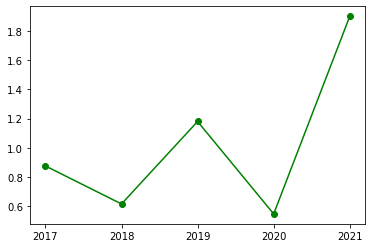

In [548]:
inflation(df_phil,'myCPI','year')

the inflation for  2021 was  5.103076308244736
the inflation for  2020 was  1.417664030842758
the inflation for  2019 was  2.5025985679271168
the inflation for  2018 was  1.4935737585695108
the inflation for  2017 was  1.8572315694835417


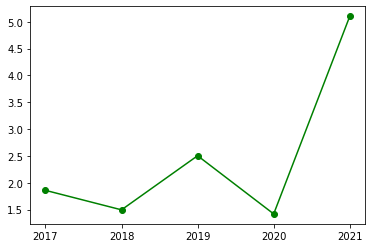

In [549]:
inflation(df_newYark, 'myCPI','year')

the inflation for  2021 was  7.185624251619704
the inflation for  2020 was  1.2772921813237081
the inflation for  2019 was  2.86333632895881
the inflation for  2018 was  0.9632962049290539
the inflation for  2017 was  2.7305976001874566


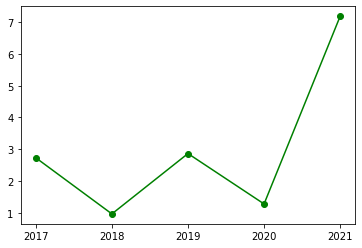

In [550]:
inflation(df_chic, 'myCPI','year')

### Creating a combined Dataframe to plot all the CPIs on one graph

In [569]:
combined = pd.DataFrame(zip(df_newYark.year,df_newYark.period,df_phil.myCPI,df_newYark.myCPI, df_chic.myCPI,df.CUUR0000SA0))

In [570]:
combined

,0,1,2,3,4,5
0,2022,M01,275.92856,272.14596,242.96072,281.148
1,2021,M12,232.72514,267.10400,240.76938,278.802
2,2021,M11,275.10648,267.67340,239.90728,277.948
3,2021,M10,230.35800,267.74944,239.03582,276.589
4,2021,M09,273.90374,266.80716,237.74562,274.310
...,...,...,...,...,...,...
56,2017,M05,262.87450,243.11050,211.49284,244.733
57,2017,M04,209.93280,243.06876,211.41622,244.524
58,2017,M03,262.29420,242.93088,210.21002,243.801
59,2017,M02,208.88694,242.11322,210.30998,243.603


In [571]:
combined = combined.rename(columns = {0:'year',1:'period', 2:'philadelphia',3:'new_york',4:'chicago',5:'nationalCPI'})

In [572]:
combined['averageCPI'] = (combined['philadelphia']*.3)+(combined['new_york']*.46)+(combined['chicago']*.24)

### Visualizations showing the differecnes between calcualted CPI and actual

the inflation for  2021 was  4.527155835483376
the inflation for  2020 was  1.1081215540995615
the inflation for  2019 was  2.1508008238416254
the inflation for  2018 was  1.0950505882614925
the inflation for  2017 was  1.718331506341797


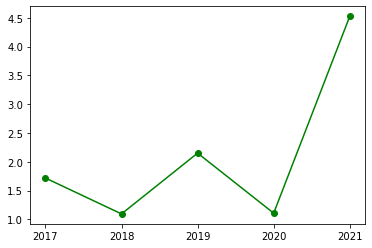

In [573]:
inflation(combined,'averageCPI','year')

### Average CPI for 3 Cities 

the inflation for  2021 was  7.479872468289117
the inflation for  2020 was  1.3997697415600863
the inflation for  2019 was  2.4865719552504606
the inflation for  2018 was  1.5512351381991252
the inflation for  2017 was  2.0705076202751638


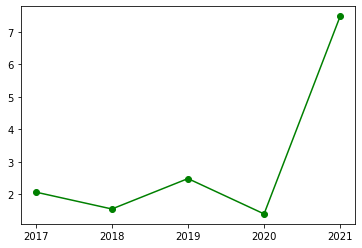

In [574]:
inflation(combined,'nationalCPI','year')

In [575]:
combined.sort_values(by=['year','period'],inplace=True,ascending=True)

In [576]:
combined

,year,period,philadelphia,new_york,chicago,nationalCPI,averageCPI
60,2017,M01,262.24834,240.93926,209.77972,242.839,239.853694
59,2017,M02,208.88694,242.11322,210.30998,243.603,224.512558
58,2017,M03,262.29420,242.93088,210.21002,243.801,240.886870
57,2017,M04,209.93280,243.06876,211.41622,244.524,225.531362
56,2017,M05,262.87450,243.11050,211.49284,244.733,241.451462
...,...,...,...,...,...,...,...
4,2021,M09,273.90374,266.80716,237.74562,274.310,261.961364
3,2021,M10,230.35800,267.74944,239.03582,276.589,249.640739
2,2021,M11,275.10648,267.67340,239.90728,277.948,263.239455
1,2021,M12,232.72514,267.10400,240.76938,278.802,250.470033


### Visualtion showing all CPIs on one graph
i don't know what happend to the philadelphia data I think the data was somehow stored incorrectly. Went over the API call and my code many times but could not find error

<AxesSubplot:xlabel='year'>

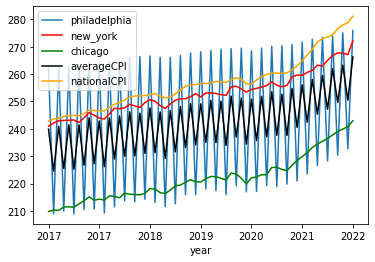

In [579]:
ax = plt.gca()
combined.plot(kind='line',x='year',y='philadelphia',ax=ax)
combined.plot(kind='line',x='year',y='new_york', color='red', ax=ax)
combined.plot(kind='line',x='year',y='chicago', color='green', ax=ax)
combined.plot(kind='line',x='year',y='averageCPI', color='black', ax=ax)
combined.plot(kind='line',x='year',y='nationalCPI', color='orange', ax=ax)